In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC

import warnings
warnings.filterwarnings("ignore")

### ЭТАП 1. ИМПОРТ БИБЛИОТЕК И ПОДГОТОВКА ДАННЫХ

In [15]:
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Для того, чтобы сравнить линейный SVM и SVM с ядром RBF и визуально отобразить различия, оставим два класса и первые два признака. 

In [17]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]

y_2d = y[y > 0]
y_2d -= 1

---
### ЭТАП 2. ЛИНЕЙНЫЙ SVM

#### Посмотрим на работу линейного SVM с разными параметрами регуляризации С. Зададим С

In [18]:
C_range = np.logspace(-2, 10, 13)
param_grid = dict(C=C_range)

#### Подбирать наилучшие параметры будем с помощью GridSearch из sklearn.model_selection с кросс-валидацией StratifiedShuffleSplit.
#### Объявите кросс-валидатор с параметрами n_splits=5, test_size=0.2, random_state=42.
#### Инициализируйте GridSearch с параметрами param_grid=param_grid, cv=cv и моделью LinearSVC(random_state=42) из sklearn.svm. Обучите на X и y.

Задание 4.1

Какой параметр С даёт наилучший score? Наилучший score возможен при:

In [24]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42,)

grid_search = GridSearchCV(
    estimator=LinearSVC(random_state=42, dual=True),
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
)

grid_search.fit(X, y)

grid_search.best_params_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increas

{'C': 1000.0}

#### Давайте посмотрим на визуализацию решающей функции с разными параметрами. Выполните код для визуализации:

[-1.35129207 -1.34246379 -1.3336355  ...  1.21390119  1.22272948
  1.23155776]
[-2.28726302 -2.26948153 -2.25170003 ...  1.74102296  1.75880446
  1.77658596]
[-2.59937742 -2.57996564 -2.56055385 ...  2.08178342  2.10119521
  2.120607  ]


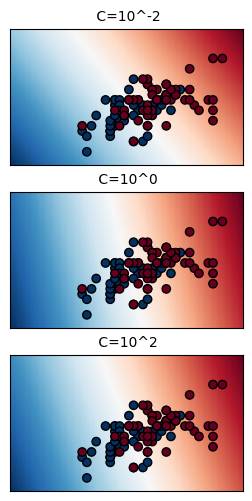

In [36]:
C_2d_range = [1e-2, 1, 1e2]
classifiers = []
for C in C_2d_range:
    clf = LinearSVC(C=C)
    clf.fit(X_2d, y_2d)
    classifiers.append((C, clf))
    

plt.figure(figsize=(3, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    #print(Z)
    Z = Z.reshape(xx.shape)
    #print(Z)

    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), 1, k + 1)
    plt.title(" C=10^%d" % (np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

----
### ЭТАП 3. SVM С ЯДРОМ RBF

### SVM с ядром радиальной базисной функции можно вызвать, используя SVC из sklearn.svm. SVC — это SVM с ядром, тип которого указывается в параметрах при инициализации SVC. Но если не указывать никакого ядра, RBF идёт по умолчанию. Поэтому вам достаточно вызвать clf = SVC(random_state=42). 
### Выполните настройку гиперпараметров с теми же параметрами (n_splits=5, test_size=0.2, random_state), но для параметров С, gamma и классификатора SVC.

In [40]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = {"C":C_range, "gamma":gamma_range}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
     cv=cv,
     n_jobs=-1
)

grid_search.fit(X, y)
grid_search.best_params_

{'C': 1.0, 'gamma': 0.1}

Визуализируйте результаты SVC для разных параметров.

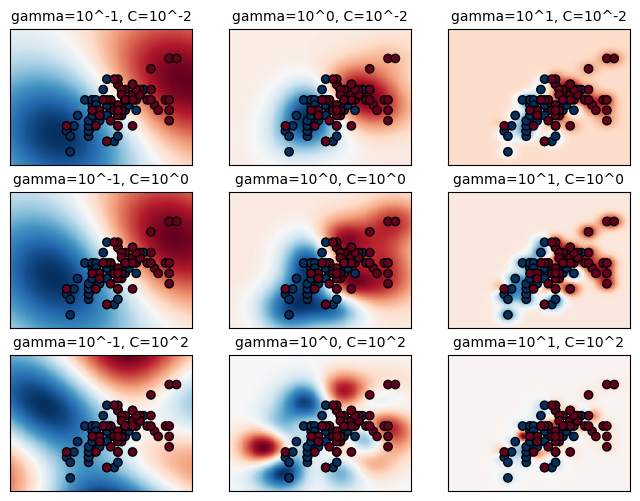

In [41]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# Визуализация
# рисуем визуализацию эффектов параметров

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")